In [ ]:
# General imports
import numpy as np

# Pre-defined ansatz circuit and operator class for Hamiltonian
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt


# https://learning.quantum.ibm.com/tutorial/variational-quantum-eigensolver

In [2]:
# runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)

RequestsApiError: '403 Client Error: Forbidden for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Your IBM Quantum account has been disabled. Learn more: https://ibm.biz/BdfaME., Error code: 3485.'

In [3]:
hamiltonian = SparsePauliOp.from_list(
    [("YZ", 0.3980), ("ZI", -0.3980), ("ZZ", -0.0113), ("XX", 0.1810)]
)

ansatz = EfficientSU2(hamiltonian.num_qubits)
ansatz.decompose().draw("mpl", style="iqp")

num_params = ansatz.num_parameters
num_params

16

In [5]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

ansatz_isa = pm.run(ansatz)
ansatz_isa.draw(output="mpl", idle_wires=False, style="iqp")

NameError: name 'backend' is not defined

In [ ]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [8]:
x0 = 2 * np.pi * np.random.random(num_params)

hamiltonian_isa = hamiltonian.apply_layout(layout=ansatz_isa.layout)

NameError: name 'ansatz_isa' is not defined

In [9]:
with Session(backend=backend) as session:
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 10000

    res = minimize(
        cost_func,
        x0,
        args=(ansatz_isa, hamiltonian_isa, estimator),
        method="cobyla",
    )

NameError: name 'backend' is not defined

NameError: name 'cost_history_dict' is not defined

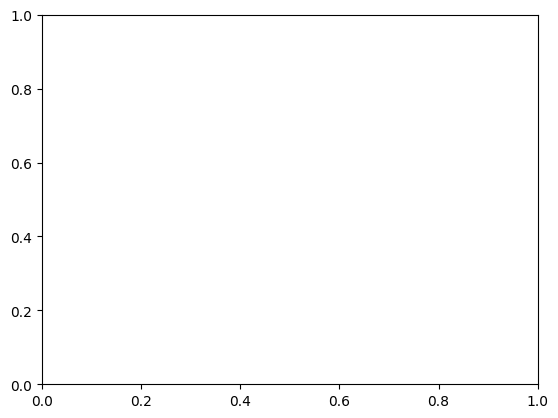

In [10]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
def miniMaxSum(arr):
    # Write your code here
    sum_arr = []
    for elem in arr:
        sum_arr.append(sum(arr) - elem)
    print (max(sum_arr), min(sum_arr))

In [44]:
arr = [1, 2, 3, 4, 5]
miniMaxSum(arr)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
14 10


In [85]:
def timeConversion(s):
    # Write your code here
    tn = int(s[:2])
    form = s[-2:]
    # time  = int(time.replace(":",""))
    if form == "PM" and tn != 12:
        tn += 12
        # s.replace(s[:2],str(tn))
        s = str(tn) + s[2:]

    else:
        pass
    print(s[:-2])


timeConversion('07:05:45PM')

19:05:45


In [99]:

def findMedian(arr):
    # Write your code here
    arr.sort()
    if len(arr) % 2 == 0:
        return arr[int(len(arr) / 2)]
    else:
        return ( arr[int(len(arr) / 2)] + arr[int(len(arr) - 1 / 2)] ) / 2
    print(arr)
arr = [5,6,3,1]
findMedian(arr)

5